# Estimating the state of a dynamic system {-}

Assume a system that changes its state over time. In a one-dimensional world a robot is driving with constant velocity along the x-axis and we want to estimate the system state by observing the distance travelled.

![laserscan](fig/laserscan.png)

The velocity of the robot is defined as the rate of change in distance with respect to time:

\begin{equation*}
  \dot x = \frac{dx}{dt}
\end{equation*}

Assuming constant velocity, a reasonable dynamic model of the system may be written as follows:

*Time update*:

\begin{align*}
  \tilde{x}_n =& \hat{x}_{n-1} + \hat{\dot{x}}_{n-1} \cdot \Delta t \\
  \tilde{\dot{x}}_n =& \hat{\dot{x}}_{n-1} \\
\end{align*}

*Measurement update*:

\begin{align*}
  \hat{x}_n =& \tilde{x}_n + \alpha (z_n - \tilde{x}_n) \\
  \hat{\dot{x}}_n =& \tilde{\dot{x}}_n + \beta (\frac{z_n - \tilde{x}_n}{\Delta t}) \\
\end{align*}

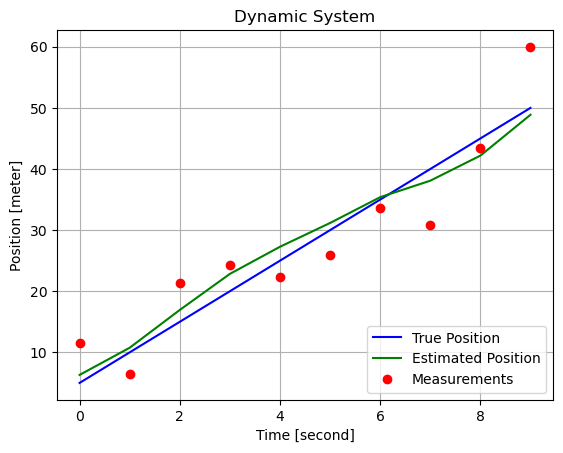

In [1]:
from numpy import arange, random
import matplotlib.pyplot as plt

# System parameters
dt = 1       # sampling interval [second]
samples = 10 # number of samples

# Inital state
x = 0        # [meter]
x_dot = 5    # [meter/second]

alpha = 0.2  # gain factor alpha
beta = 0.1   # gain factor beta

# Initialize plot vectors
time = arange(0, samples)
pos_true = []; pos_est = []; z = []

for i in range(0, samples):
    
    # Generate true trajectory
    x = x + x_dot*dt
    
    # Generate normal distributed observations from true trajectory
    pos_true.append(x)
    z.append(x + random.normal(0, 5))

x = 0
for i in range(0, samples):

    # Time update
    x = x + x_dot*dt
    x_dot = x_dot
    
    # Measurement update
    x = x + alpha*(z[i] - x)
    x_dot = x_dot + beta*((z[i] - x)/dt)
    pos_est.append(x)
    
# Plot result
plt.plot(time, pos_true, 'b', label='True Position')
plt.plot(time, pos_est, 'g', label='Estimated Position')
plt.plot(time , z, 'ro', label='Measurements')
plt.title('Dynamic System')
plt.xlabel('Time [second]')
plt.ylabel('Position [meter]')
plt.legend(loc='lower right')
plt.grid(True, which='both')
plt.show()